# 第35讲：代数方程与微分方程求解

## 线性代数方程组、高次代数方程求解

将方程整理成为$f(x,y,z，...)=0$形式，调用**sy.solve(f(x,y,z,...))**求解

线性代数方程组
$$
\begin{cases} 
x+2y+3z=9     \\
4x+5y+6z=-15   \\
7x+8y+10z=39
\end{cases}
$$

In [4]:
import sympy as sy
sy.var('x y z')
#线性代数方程组求解
sol=sy.solve([x+2*y+3*z-9,4*x+5*y+6*z+15,7*x+8*y+10*z-39]);
print(sol)
list(sol.values())

{x: 53, y: -139, z: 78}


[53, -139, 78]

## 一元3次代数方程求解
$x^3-2*x^2+4*x=16$

In [20]:
sol= sy.solve(x**3-2*x**2+4*x-16)
q=sy.Matrix(sol).evalf();
q

Matrix([
[-0.353209964199324 - 2.40564163857096*I],
[-0.353209964199324 + 2.40564163857096*I],
[                       2.70641992839865]])

## 线性代数方程组矩阵法求解

以线性代数方程组
$$
\begin{cases} 
x+2y+3z=9     \\
4x+5y+6z=-15   \\
7x+8y+10z=39
\end{cases}
$$
为例展示解法过程。

In [19]:
import sympy as sy
import numpy as np
A=sy.Matrix([[1,2,3],[4,5,6],[7,8,10]])
B=sy.Matrix([[9],[-15],[39]])
p=sy.linsolve((A,B))   #解方程组
sol=list(p)[0];       #提取解数据
print(sol)
X=sy.Matrix(sol);#计算误差
er=np.array(A*X-B).max()
print('error=',er)

(53, -139, 78)
error= 0


## sympy的线性代数——矩阵运算函数

In [21]:
import sympy as sy
A=sy.Matrix([[1.0,2],[3,4]])
#A.<TAB>可以查到sympy的几乎所有矩阵函数，例如
print(A.inv())
print(A.det())
print(A.trace())
print(A.rank())

Matrix([[-2.00000000000000, 1.00000000000000], [1.50000000000000, -0.500000000000000]])
-2.00000000000000
5.00000000000000
2


In [23]:
#矩阵特征值
val=A.eigenvals(multiple=True);
print(val)
#矩阵特征向量
v=A.eigenvects()
v1=v[0][2][0];v2=v[1][2][0]
print(v1)
print(v2)

[-0.372281323269014, 5.37228132326901]
Matrix([[0.824564840132394], [-0.565767464968992]])
Matrix([[0.422229150415260], [0.923052314250193]])


## 微分方程函数解

在信号处理部分，我们已经学习了线性时不变系统的微分方程数值解法。现在我们来学习微分方程函数解的解法。

可以使用SymPy的dsolve解有解析解的常微分方程。需要用Function创建未知的符号函数:

In [30]:
x = sy.Symbol("x"); 
f = sy.Function("f"); 
g = sy.Function("g")(x)
#f 和 g是没有具体定义的未知函数。可以对f(x),g求符号导数。
print(f(x).diff(x, x) + f(x))
sy.dsolve(f(x).diff(x, x) + f(x), f(x))

f(x) + Derivative(f(x), (x, 2))


Eq(f(x), C1*sin(x) + C2*cos(x))

可以向dsolve传递键值参数，确认是否找到最适合的解。

例如，使用关键词hint=’separable’强制dsolve视方程为独立方程。

In [25]:
sy.dsolve(sy.sin(x)*sy.cos(f(x)) + sy.cos(x)*sy.sin(f(x))*f(x).diff(x), f(x), hint='separable')

[Eq(f(x), -acos(C1/cos(x)) + 2*pi), Eq(f(x), acos(C1/cos(x)))]

## 微分方程函数解求解举例

1.使用键值参数 hint='Bernoulli'求解求解一阶变系数Bernoulli方程x*f'(x)+f(x)(1-f(x))=0。

In [26]:
import sympy as sy
x=sy.Symbol("x")
f=sy.Function("f")
sol=sy.dsolve(x*f(x).diff(x)+f(x)*(1-f(x)),f(x),hint="Bernoulli");
sol

Eq(f(x), 1/(C1*x + 1))

2. 求解一阶变系数常微分方程： f'(x)-x**2*f(x)+x**4=0

In [15]:
sol=sy.dsolve(f(x).diff(x)+x**4-x**2*f(x),f(x));
sol

Eq(f(x), (C1 - 3**(2/3)*lowergamma(5/3, x**3/3))*exp(x**3/3))

3. 求解二阶常系数常微分方程**初值问题**y''(t)+5y'(t)+6y(t)=50cos(4t),y(0)=2,y'(0)=5

Eq(y(t), 2*sin(4*t) - cos(4*t) + 6*exp(-2*t) - 3*exp(-3*t))


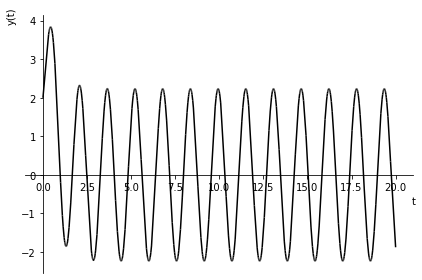

In [41]:
import sympy as sy;
sy.var('t');
y=sy.Function('y')(t)
eq=y.diff(t,2)+5*y.diff(t)+6*y-50*sy.cos(4*t)
ics0={y.subs(t,0):2,y.diff(t).subs(t,0):5}
sol=sy.dsolve(eq,y,ics=ics0);
print(sol)
#画解函数曲线
sy.plotting.plot(sol.rhs,(t,0,20),line_color='k',ylabel='y(t)')

## 边值问题求解举例
请调用sympy.dsolve求解边值问题
 $$u''(x)+16u(x)=16x(\pi-x),0<=x<=\pi.$$
解此边值问题需要的python程序bv.py如下：


u(x)= -x**2/16 + pi*x/16 + sin(4*x) - cos(4*x)/128 + 1/128


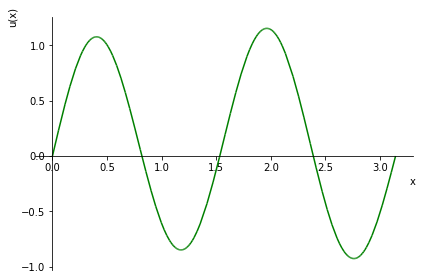

In [28]:
import sympy as sy
pp=sy.plotting.plot
sy.var('x C1')
u=sy.Function('u')(x)
eq=u.diff(x,2)+16*u-x*(sy.pi-x)           #方程eq=0
ics0={u.subs(x,0):0,u.subs(x,sy.pi):0}    #边值
sol=sy.dsolve(eq,ics=ics0)                #解边值问题
def u(x):
    return sol.rhs.subs({C1:1})          #取解函数
print('u(x)=',u(x))
v=dict(line_color='g',ylabel='u(x)')
pp(u(x),(x,0,sy.pi),**v)